In [160]:
import pandas as pd
import re
from collections import Counter
import gzip
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns

In [266]:
raw_csv_patents = list(Path('raw_csv').glob('*csv.gz'))
raw_csv_patents

[PosixPath('raw_csv/CID_12111_patent.csv.gz'),
 PosixPath('raw_csv/CID_122891_patent.csv.gz'),
 PosixPath('raw_csv/CID_124072_patent.csv.gz'),
 PosixPath('raw_csv/CID_13782487_patent.csv.gz'),
 PosixPath('raw_csv/CID_21260_patent.csv.gz'),
 PosixPath('raw_csv/CID_232446_patent.csv.gz'),
 PosixPath('raw_csv/CID_3086375_patent.csv.gz'),
 PosixPath('raw_csv/CID_3292100_patent.csv.gz'),
 PosixPath('raw_csv/CID_4534_patent.csv.gz'),
 PosixPath('raw_csv/CID_4764_patent.csv.gz'),
 PosixPath('raw_csv/CID_4788_patent.csv.gz'),
 PosixPath('raw_csv/CID_623849_patent.csv.gz'),
 PosixPath('raw_csv/CID_634278_patent.csv.gz'),
 PosixPath('raw_csv/CID_6618_patent.csv.gz'),
 PosixPath('raw_csv/CID_6619_patent.csv.gz'),
 PosixPath('raw_csv/CID_66237_patent.csv.gz'),
 PosixPath('raw_csv/CID_6623_patent.csv.gz'),
 PosixPath('raw_csv/CID_6626_patent.csv.gz'),
 PosixPath('raw_csv/CID_66782_patent.csv.gz'),
 PosixPath('raw_csv/CID_66802_patent.csv.gz'),
 PosixPath('raw_csv/CID_67174_patent.csv.gz'),
 PosixPa

In [221]:
p1 = Path('raw_csv') / 'CID_6623_patent.csv.gz'
p1


PosixPath('raw_csv/CID_6623_patent.csv.gz')

In [222]:
with gzip.open(p1, 'r') as fp:
    lines =[line for i,line in zip(range(10), fp)]
lines

[b'publicationnumber,cids,sids,title,abstract,prioritydate,grantdate,inventors,assignees,classification,family,aids,geneids,protacxns,taxids\n',
 b'   AT-126432-T,6623,419479223,Use of bisphenol derivatives for treating diabetes mellitus.,NULL,19890726,NULL,NULL,NULL,NULL,NULL,NULL,NULL,NULL,NULL\n',
 b'AT-132484-T,6623,419479223,BISPHENOL DERIVATIVES AND THEIR USE AS COATING AGENTS,NULL,19910418,NULL,NULL,NULL,NULL,NULL,NULL,NULL,NULL,NULL\n',
 b'AT-143966-T,6623|107908,419479223|419546960,New cycloalkylides bisphenol phosphite,NULL,19920121,NULL,NULL,NULL,NULL,NULL,NULL,NULL,NULL,NULL\n',
 b'AT-154582-T,6623,419479223,Method for producing high purity bisphenol a,NULL,19901124,NULL,NULL,NULL,NULL,NULL,NULL,NULL,NULL,NULL\n',
 b'AT-184270-T,6623,419479223,Recovery of valuable substances from distillation cycles of bisphenol-a production,NULL,19930301,NULL,NULL,NULL,NULL,NULL,NULL,NULL,NULL,NULL\n',
 b'AT-245617-T,6623,419479223,Method for producing bisphenol alcoxylates,NULL,19990622,N

In [239]:
df = pd.read_csv(p1, compression='gzip', header=0, sep=',', quotechar='"', low_memory=False)


In [253]:
df = df[~df['prioritydate'].isna()]

In [263]:
pd.to_datetime(df['prioritydate'].astype(int).astype(str))

0        1989-07-26
1        1991-04-18
2        1992-01-21
3        1990-11-24
4        1993-03-01
            ...    
198610   2019-06-25
198611   2019-06-27
198612   2019-06-27
198613   2019-06-27
198614   2019-06-27
Name: prioritydate, Length: 198542, dtype: datetime64[ns]

In [141]:
df[df['publicationnumber'].str.match('EP-.*-A.*')]

,prioritydate,publicationnumber,cids,sids,title,abstract,grantdate,inventors,assignees,classification,family,aids,geneids,protacxns,taxids
4542,1977-06-07,EP-0000084-A1,6492|7306|7308|7956|8096|8398|11599|12757|3140...,127351521|127904803|128047718|128126643|128379...,Use of alpha-polyolefin compositions for extru...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4543,1977-06-23,EP-0000216-A1,453|890|985|1198|2334|3893|6811|6912|7308|7618...,226393339|226393712|226393714|226393970|226393...,Detergent composition with a suds-regulating s...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9755|22973|119431
4544,1977-07-07,EP-0000354-A1,949|6486|6815|6911|6928|7308|8221|8348|8398|10...,226395053|226396035|226397450|226399517|226400...,"Mixtures that contain phosphonite, and polymer...","Substituted 6-phenoxy-dibenz- [c, e] - [1,2] -...",NaN,RASBERGER MICHAEL DR|HOFMANN PETER DR,CIBA GEIGY AG,C07F9/48|C07F9/6574|C08K5/00|C08K5/13|C08K5/53...,EP-0000354-A1|JP-S5418479-A,NaN,NaN,NaN,NaN
4545,1977-07-12,EP-0000357-A1,6325|6641|7308|11450|12738|443953|1549624|1185...,226408288|226424872|226454342|226505858|232580...,Process for the preparation of cross-linkable ...,Process for the production of molding composit...,NaN,GLASER RUDOLF DR|MOORWESSEL DIETER DR|BAUER PE...,BASF AG,B29C47/10|C08J3/20|C08K5/14|C08L101/00|C08L23/...,DE-2731420-A1|DE-2731420-B2|EP-0000357-A1|JP-S...,NaN,NaN,NaN,12078
4546,1977-08-25,EP-0001207-A1,243|3893|5192|6251|6510|7308|8348|13232|15625|...,226393440|226393605|226393819|226394040|226394...,"Urea derivatives, their preparation and their ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54661,2018-02-13,EP-3753986-A1,135|243|323|338|370|471|785|798|932|1057|1183|...,226393282|226393662|226393781|226393816|226393...,Composition and molded body,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,293|407|1279|2157|4313|21634|41275|113210|176279
54940,2014-03-17,EP-3677659-A1,323|568|7308|8129|12514|17113|62531|62603|6481...,226394040|226394635|226397779|226399454|226405...,Liquid crystalline medium,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
54941,2018-02-23,EP-3755733-A1,244|289|335|460|785|949|2374|2879|4650|5395|57...,226393257|226393271|226393280|226393281|226393...,Non-leaching styrene-free cured-in-place pipe ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
54942,2018-02-23,EP-3757150-A1,453|785|949|985|2682|3102|3338|3893|4632|5054|...,226393245|226393271|226393712|226393714|226393...,Polycarbonate resin and method for manufacturi...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [267]:
def filter_ep_applications(p, selection_regex='EP-.*-A.*'):
    df = pd.read_csv(p, compression='gzip', header=0, sep=',', quotechar='"', low_memory=False)
    df = df[~df['prioritydate'].isna()]
    df['prioritydate'] = pd.to_datetime(df['prioritydate'].astype(int).astype(str))
    ep_applications = df[df['publicationnumber'].str.match(selection_regex)]
    return ep_applications

In [268]:
output_dir = Path('ep_applications')
output_dir.mkdir(exist_ok=True)

for p in raw_csv_patents:
    try:
        base_name = p.stem
        ep_applications = filter_ep_applications(p)
        ep_applications.to_csv(output_dir / base_name, index=False)
    except gzip.BadGzipFile:
        print(f"Error reading {p}")
    

In [269]:
filtered_applications = list(Path('ep_applications').glob('*.csv'))

In [270]:
filtered_applications[16]

PosixPath('ep_applications/CID_6623_patent.csv')

In [277]:
def read_pubchem_patent_csvs(p):
    df = pd.read_csv(p, header=0, sep=',', quotechar='"')
    df['prioritydate'] = pd.to_datetime(df['prioritydate'])
    return df

In [278]:

application_dfs = [read_pubchem_patent_csvs(p) for p in filtered_applications]


In [279]:
application_dfs[9]['prioritydate']

0      2019-06-17
1      2019-04-26
2      2019-03-06
3      2019-01-14
4      2018-12-20
          ...    
5528   1977-07-20
5529   1977-07-04
5530   1977-06-20
5531   1977-06-16
5532   1977-05-11
Name: prioritydate, Length: 5533, dtype: datetime64[ns]

In [280]:
for i,df in enumerate(application_dfs):
    print(i, df['prioritydate'][0])

0 2019-06-28 00:00:00
1 2019-01-14 00:00:00
2 2018-06-14 00:00:00
3 2017-10-23 00:00:00
4 2016-06-10 00:00:00
5 1977-06-04 00:00:00
6 2018-12-19 00:00:00
7 2019-06-14 00:00:00
8 2017-12-21 00:00:00
9 2019-06-17 00:00:00
10 2019-03-05 00:00:00
11 2019-06-28 00:00:00
12 2019-05-07 00:00:00
13 1977-06-11 00:00:00
14 2019-05-31 00:00:00
15 2019-06-14 00:00:00
16 1977-06-04 00:00:00
17 2019-06-14 00:00:00
18 2019-01-14 00:00:00
19 2018-12-21 00:00:00
20 2019-03-15 00:00:00
21 1977-07-07 00:00:00
22 2017-11-21 00:00:00
23 2016-06-16 00:00:00
24 2019-06-14 00:00:00
25 2017-08-04 00:00:00
26 1977-06-07 00:00:00
27 2019-04-26 00:00:00
28 2019-04-26 00:00:00
29 2019-06-21 00:00:00
30 2019-06-14 00:00:00
31 2005-07-07 00:00:00
32 2018-03-02 00:00:00
33 2019-03-11 00:00:00
34 2019-05-31 00:00:00
35 2019-05-28 00:00:00
36 2018-01-31 00:00:00
37 2019-06-20 00:00:00
38 2019-06-28 00:00:00


In [152]:
documents_per_chemical = [len(df) for df in application_dfs]
documents_per_chemical

[6932,
 994,
 405,
 150,
 4,
 5890,
 216,
 1371,
 348,
 5533,
 683,
 2164,
 412,
 7309,
 2856,
 1071,
 39241,
 6896,
 1314,
 104,
 645,
 4368,
 67,
 69,
 4443,
 514,
 5001,
 2333,
 841,
 1303,
 1267,
 15,
 456,
 1281,
 3450,
 3391,
 464,
 3260,
 2371]

<BarContainer object of 39 artists>

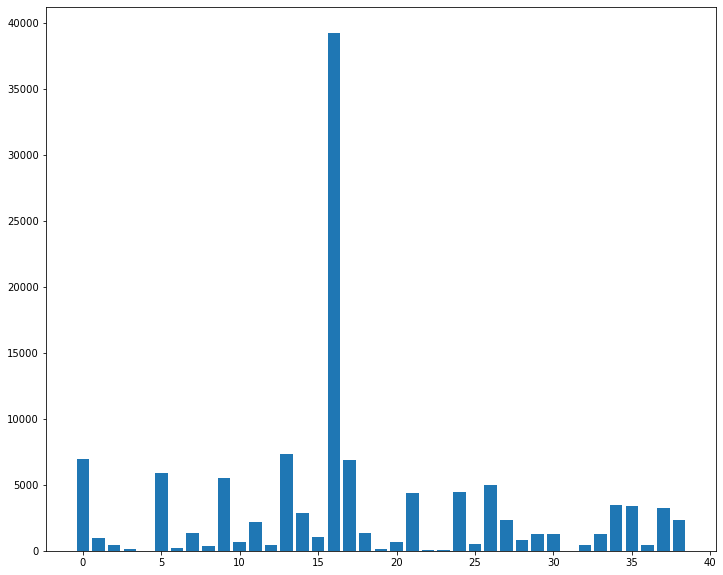

In [162]:
fig = plt.figure(figsize=(12,10))
plt.bar(range(len(documents_per_chemical)), documents_per_chemical)

In [163]:
from collections import Counter
document_ids = Counter()
for df in application_dfs:
    document_ids.update(df['publicationnumber'])
len(document_ids)

60437

In [165]:
docs, counts = zip(*document_ids.most_common())

In [170]:
count_counts = Counter(counts)
count_counts

Counter({22: 3,
         21: 1,
         18: 4,
         17: 6,
         16: 6,
         15: 24,
         14: 33,
         13: 99,
         12: 157,
         11: 221,
         10: 274,
         9: 368,
         8: 635,
         7: 1101,
         6: 1262,
         5: 1589,
         4: 2624,
         3: 3837,
         2: 8095,
         1: 40098})

In [172]:
docs_with_n_counts, n_docs = zip(*count_counts.most_common())

In [173]:
docs_with_n_counts

(1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 17, 16, 18, 22, 21)

In [174]:
n_docs

(40098,
 8095,
 3837,
 2624,
 1589,
 1262,
 1101,
 635,
 368,
 274,
 221,
 157,
 99,
 33,
 24,
 6,
 6,
 4,
 3,
 1)

Text(0, 0.5, 'Number of documents')

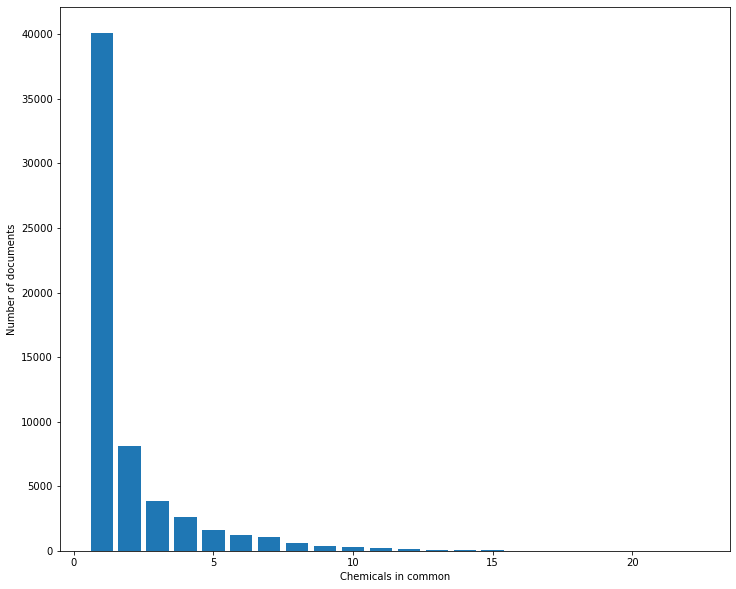

In [179]:
fig = plt.figure(figsize=(12, 10))
plt.bar(docs_with_n_counts, n_docs)
plt.xlabel('Chemicals in common')
plt.ylabel('Number of documents')

In [177]:
kind_code_counts = Counter()
for df in application_dfs:
    application_codes = [patent_id.split('-')[-1] for patent_id in df['publicationnumber']]
    kind_code_counts.update(application_codes)

In [178]:
kind_code_counts

Counter({'A1': 86558, 'A2': 28145, 'A9': 87, 'A4': 2046, 'A3': 2584, 'A8': 12})

In [185]:
kind_codes, kind_counts = list(zip(*sorted(kind_code_counts.items())))

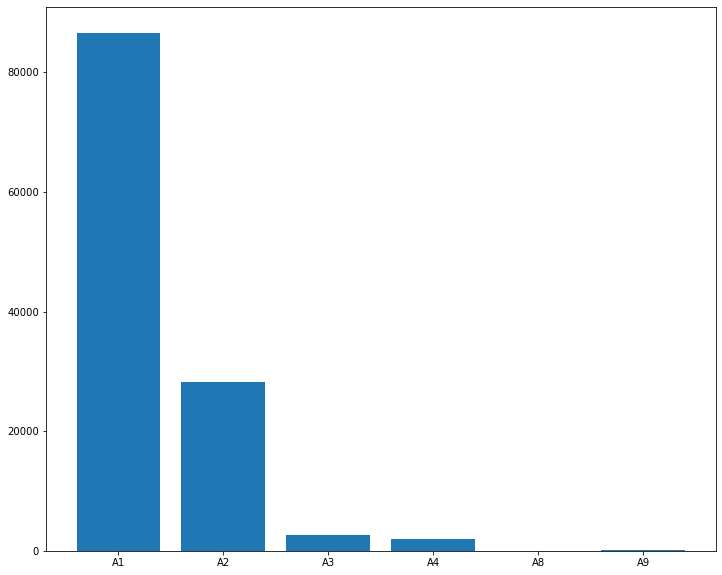

In [190]:
fig = plt.figure(figsize=(12,10))
x = list(range(len(kind_codes)))
plt.bar(x, kind_counts)
plt.xticks(x, kind_codes);

In [286]:
from collections import defaultdict

split_documents = defaultdict(dict)

for df in application_dfs:
    for date, document_id in zip(df['prioritydate'].tolist(), df['publicationnumber'].tolist()):
        ep, number, kind_code = document_id.split('-')
        split_documents['-'.join([ep, number])][kind_code] = date.year
    

In [287]:
split_documents

defaultdict(dict,
            {'EP-3757158': {'A1': 2019},
             'EP-3738996': {'A1': 2019},
             'EP-3738771': {'A1': 2019},
             'EP-3736132': {'A1': 2019},
             'EP-3730549': {'A1': 2019},
             'EP-3725827': {'A1': 2019},
             'EP-3715406': {'A1': 2019},
             'EP-3702410': {'A1': 2019},
             'EP-3689965': {'A1': 2019},
             'EP-3680270': {'A1': 2019},
             'EP-3725847': {'A1': 2019},
             'EP-3670597': {'A1': 2018},
             'EP-3670604': {'A1': 2018},
             'EP-3670618': {'A1': 2018},
             'EP-3670553': {'A1': 2018},
             'EP-3660075': {'A1': 2018},
             'EP-3660117': {'A1': 2018},
             'EP-3643500': {'A1': 2018},
             'EP-3643493': {'A1': 2018},
             'EP-3643747': {'A1': 2018},
             'EP-3643748': {'A1': 2018},
             'EP-3643749': {'A1': 2018},
             'EP-3640276': {'A1': 2018},
             'EP-3640275': {'A1': 2018}

In [288]:
len(split_documents)

57852

In [289]:
a1_years = [kind_dates['A1'] for kind_dates in split_documents.values() if 'A1' in kind_dates]

In [290]:
a1_years

[2019,
 2019,
 2019,
 2019,
 2019,
 2019,
 2019,
 2019,
 2019,
 2019,
 2019,
 2018,
 2018,
 2018,
 2018,
 2018,
 2018,
 2018,
 2018,
 2018,
 2018,
 2018,
 2018,
 2018,
 2018,
 2018,
 2018,
 2018,
 2018,
 2018,
 2018,
 2018,
 2018,
 2018,
 2018,
 2018,
 2018,
 2018,
 2018,
 2018,
 2018,
 2018,
 2018,
 2018,
 2018,
 2018,
 2018,
 2018,
 2018,
 2018,
 2018,
 2018,
 2018,
 2018,
 2018,
 2018,
 2017,
 2017,
 2017,
 2017,
 2017,
 2017,
 2017,
 2017,
 2017,
 2017,
 2017,
 2017,
 2017,
 2017,
 2017,
 2017,
 2017,
 2017,
 2017,
 2017,
 2017,
 2017,
 2017,
 2017,
 2017,
 2017,
 2017,
 2017,
 2017,
 2017,
 2017,
 2017,
 2017,
 2017,
 2017,
 2017,
 2017,
 2017,
 2017,
 2017,
 2017,
 2017,
 2017,
 2017,
 2017,
 2017,
 2017,
 2017,
 2017,
 2017,
 2017,
 2017,
 2017,
 2017,
 2017,
 2017,
 2017,
 2017,
 2017,
 2017,
 2017,
 2017,
 2017,
 2017,
 2017,
 2017,
 2017,
 2017,
 2017,
 2017,
 2017,
 2017,
 2017,
 2017,
 2017,
 2017,
 2017,
 2017,
 2017,
 2017,
 2017,
 2017,
 2017,
 2017,
 2017,
 2017,
 2017,

In [291]:
year_counts = Counter(a1_years)

In [292]:
year_counts

Counter({2019: 166,
         2018: 571,
         2017: 1993,
         2016: 2094,
         2015: 2181,
         2014: 2054,
         2013: 1990,
         2012: 1855,
         2011: 1699,
         2010: 1633,
         2009: 1623,
         2008: 1564,
         2007: 1482,
         2006: 1541,
         2005: 1606,
         2004: 1618,
         2003: 1408,
         2002: 1377,
         2001: 1168,
         2000: 1028,
         1999: 1216,
         1998: 1153,
         1997: 974,
         1996: 845,
         1995: 809,
         1994: 767,
         1993: 713,
         1992: 788,
         1991: 828,
         1990: 648,
         1989: 578,
         1988: 404,
         1987: 331,
         1986: 293,
         1985: 336,
         1984: 299,
         1983: 321,
         1982: 314,
         1981: 297,
         1980: 277,
         1979: 282,
         1978: 237,
         1977: 121})

In [293]:
years, counts = zip(*sorted(year_counts.items()))

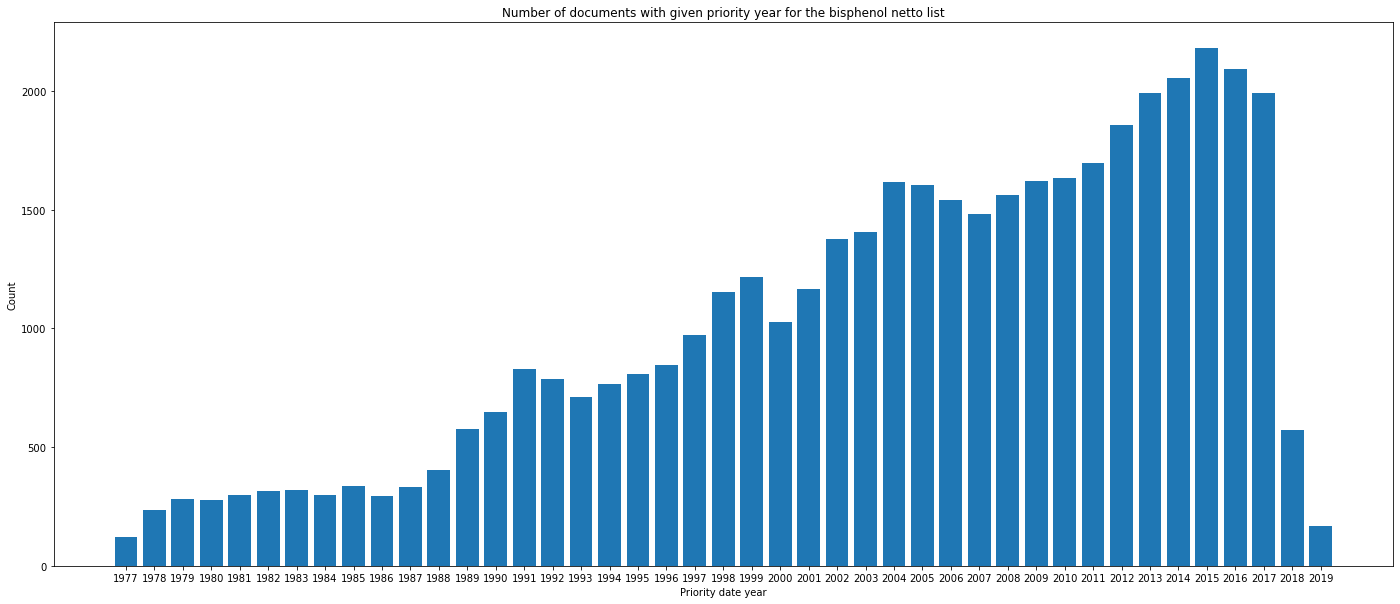

In [298]:
fig = plt.figure(figsize=(24,10))
x = range(len(years))
plt.bar(x, counts)
plt.xlabel('Priority date year')
plt.ylabel('Count')
plt.title('Number of documents with given priority year for the bisphenol netto list')
plt.xticks(x, years);

In [302]:
import json
with open('netto_list_patents.json','w') as fp:
    json.dump(split_documents, fp, indent=4, sort_keys=True)